# Treatment T11

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
import imblearn


TREATMENT = "txx.resp"

export_folder = f"../data/output/diagrams/{TREATMENT}"
os.makedirs(export_folder, exist_ok=True)

dfs = {}
dfs_full = {}

result_df = pd.DataFrame(index=range(105))
stats = pd.DataFrame(index=["min_offer", "min_offer_final"])

TREATMENTS = {"t00", "t10a", "t11a", "t12", "t13", "t20"}

for treatment in TREATMENTS:

    # Read and sanitize the data
    df = pd.read_csv(f"../data/{treatment}/export/result__{treatment}_resp.csv")
    df_full = df.copy()
    # drop_cols = ["worker_id", "resp_worker_id", "prop_worker_id", "updated", "status", "job_id", "status", "timestamp", "rowid", "offer_dss", "offer", "offer_final", "completion_code"]
    drop_cols = ["worker_id", "resp_worker_id", "prop_worker_id", "updated", "status", "job_id", "status", "timestamp", "rowid", "offer_dss", "offer", "offer_final", "completion_code", "prop_time_spent"]
    df = df[[col for col in df.columns if col not in drop_cols]]
    if "min_offer_final" not in df_full:
        df_full["min_offer_final"] = df_full["min_offer"]
    
    dfs[treatment] = df
    dfs_full[treatment] = df_full
    result_df[treatment+"."+"min_offer"] = df_full["min_offer"]
    result_df[treatment+"."+"min_offer_final"] = df_full["min_offer_final"]
    stats[treatment] = [df_full["min_offer"].mean(), df_full["min_offer_final"].mean()]
    

cols = [col for col in df.columns if col != "min_offer"] + ["min_offer"]


/home/franck/anaconda3/envs/thesis/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
result_df.describe()

,t13.min_offer,t13.min_offer_final,t00.min_offer,t00.min_offer_final,t11a.min_offer,t11a.min_offer_final,t20.min_offer,t20.min_offer_final,t12.min_offer,t12.min_offer_final,t10a.min_offer,t10a.min_offer_final
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,38.904762,41.095238,40.333333,40.333333,39.952381,39.952381,41.333333,41.333333,41.380952,43.809524,41.285714,41.285714
std,15.222405,16.495643,18.775837,18.775837,21.241460,21.241460,22.884184,22.884184,20.887695,21.128315,19.673153,19.673153
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,30.000000,35.000000,35.000000,25.000000,25.000000,25.000000,25.000000,30.000000,30.000000,30.000000,30.000000
50%,45.000000,45.000000,45.000000,45.000000,40.000000,40.000000,45.000000,45.000000,40.000000,40.000000,40.000000,40.000000
75%,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
max,85.000000,85.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


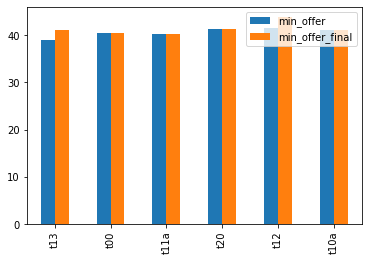

In [3]:
#sns.set()
stats.T.plot.bar()

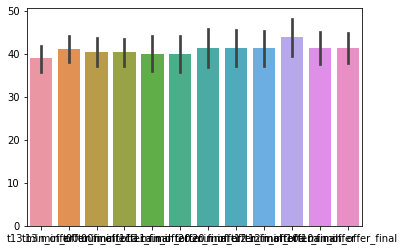

In [4]:
import seaborn as sns

result_df.columns

sns.barplot(data=result_df)

**Correlation to the target value**

**Responder's min_offer / Proposer's over and final_offer distribution**

../data/output/diagrams/txx.resp


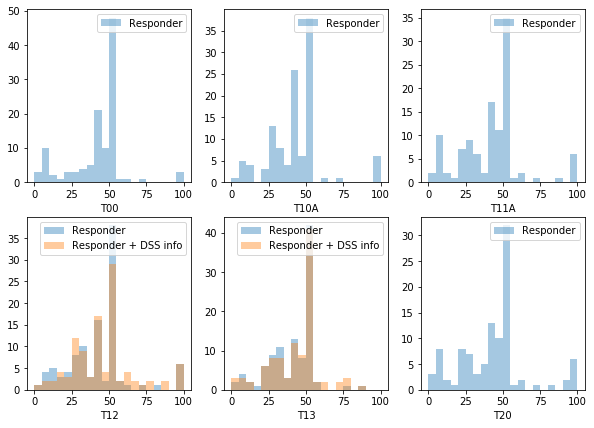

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

In [5]:

bins = list(range(0, 105, 5))

idx = 0

f, axes = plt.subplots(2, 3, figsize=(10, 7))

for treatment in sorted(TREATMENTS):
    df = dfs_full[treatment]
    fig = plt.figure(figsize=(5, 4))
    ax = sns.distplot(df["min_offer"], hist=True, kde=False, bins=bins, ax=axes[idx//3, idx%3],  axlabel=treatment.upper(), label="Responder")
    _ = ax.legend()
    if treatment.upper() not in {"T00", "T10A", "T11A", "T20A", "T20"}:
        ax = sns.distplot(df["min_offer_final"], hist=True, kde=False, bins=bins, ax=axes[idx//3, idx%3],  axlabel=treatment.upper(), label="Responder + DSS info")
    _ = ax.legend(loc="best")
    
    idx += 1
_ = plt.tight_layout()


f.savefig(os.path.join(export_folder, "min_offers.pdf"), bbox_inches='tight')

print(export_folder)

In [6]:
# bins = list(range(-100, 105, 5))

# plt.figure(figsize=(8,4))
# offer_min_offer_diff = df_full["offer"] - df_full["min_offer"]
# ax = sns.distplot(offer_min_offer_diff, hist=True, kde=False, axlabel="offer - minimum offer", bins=bins, label="Proposer")
# _ = ax.set_ylabel("Frequefncy")


# offer_min_offer_diff = df_full["offer_final"] - df_full["min_offer"]
# ax = sns.distplot(offer_min_offer_diff, hist=True, kde=False, axlabel="offer - minimum offer", bins=bins, label="Proposer + DSS", ax=ax)
# plt.legend()
# plt.tight_layout()
# ax.figure.savefig(os.path.join(export_folder, "offer-min_offer.pdf"))

In [7]:
from core.models.metrics import cross_compute, avg_gain_ratio, gain_mean, rejection_ratio, loss_sum, MAX_GAIN

def get_infos(min_offer, offer, metrics=None, do_cross_compute=False):
    if metrics is None:
        metrics = [avg_gain_ratio, gain_mean, rejection_ratio, loss_sum]
    #df = pd.DataFrame()
    infos = dict()
    for idx, metric in enumerate(metrics):
        if do_cross_compute:
            infos[metric.__name__] = cross_compute(min_offer, offer, metric)
        else:
            infos[metric.__name__] = metric(min_offer, offer)

    return infos

**Proposer's performance**

In [8]:
# df_infos = pd.DataFrame()
# #Human (fixed-matching) performance t00
# df_infos = df_infos.append(get_infos(df_full['min_offer'], df_full['offer']), ignore_index=True)
# #Human (cross-matched) average performance t00
# df_infos = df_infos.append(get_infos(df_full['min_offer'], df_full['offer'], do_cross_compute=True), ignore_index=True)
# #Human + DSS (fixed-matching) performance t00
# df_infos = df_infos.append(get_infos(df_full['min_offer'], df_full['offer_final']), ignore_index=True)
# #Human + DSS(cross-matched) average performance t00
# df_infos = df_infos.append(get_infos(df_full['min_offer'], df_full['offer_final'], do_cross_compute=True), ignore_index=True)
# #Top-model (fixed 50% prediction) average performance t00
# fixed_offer = MAX_GAIN // 2
# df_infos = df_infos.append(get_infos(df_full['min_offer'], [fixed_offer], do_cross_compute=True), ignore_index=True)

# df_infos.index = ["Proposer", "Proposer (cross matched)", "Proposer + DSS", "Proposer + DSS (cross matched)", "AI-System"]

# df_infos = df_infos.loc[["Proposer", "Proposer + DSS", "AI-System"]]
# df_infos


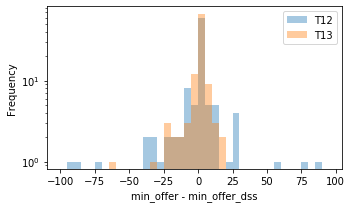

In [15]:
np.histogram(df["min_offer"] - df["min_offer_final"])

plt.figure(figsize=(5,3))
tmp = pd.DataFrame()
tmp["t12#min_offer"] = result_df["t12.min_offer"] - result_df["t12.min_offer_final"]
tmp["t13#min_offer"] = result_df["t13.min_offer"] - result_df["t13.min_offer_final"]


bins = np.arange(-100, 100, 5)
ax = sns.distplot(tmp["t12#min_offer"], hist=True, kde=False, axlabel="Responder minimum offer", bins=bins, label="T12")
ax = sns.distplot(tmp["t13#min_offer"], hist=True, kde=False, axlabel="min_offer - min_offer_dss", bins=bins, label="T13")
ax.legend(loc='best')
_ = ax.set_ylabel("Frequency")

ax.set_yscale('log')
plt.tight_layout()


ax.figure.savefig(os.path.join(export_folder, "t12vst13diff.pdf"))

In [10]:
tmp.describe()

,t12#min_offer,t13#min_offer
count,105.000000,105.000000
mean,-2.428571,-2.190476
std,22.254151,9.630775
min,-95.000000,-65.000000
25%,-5.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,85.000000,15.000000
